## EDA and Data Transformations
#### <a href="#hist">Inspecting Spread of Features</a><br>
   -  <a href="#dropunivariate">Dropping features from univariate analysis</a><br>
#### <a href="#missing">Missingness</a><br>
   -  <a href="#wholemissing">Whole dataset</a><br>
   -  <a href="#intmissing">Integer Features</a><br>
   -  <a href="#catmissing">Categorical Object Features</a><br>
   -  <a href="#skew">Analyze and fix skew</a><br>
   -  <a href="#standardize">Standardize the data</a><br>
#### <a href="#VIF">Calculating VIF of Continuous Features</a><br>
   
   -  <a href="#imputemissing">Impute Missing Values</a><br>
   -  <a href="#dummy">Convert Categorical features to Dummy Variables</a><br>
   -  <a href="#lasso">Lasso Regression for Feature Selection</a><br>



In [1]:
from sklearn import model_selection, preprocessing 
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from patsy import dmatrices
import random 
from scipy.stats import skew

### Read In the data

In [2]:
# Read in the Data
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

# Separate the train dataframes in to target and predictor 
y_train = train.SalePrice
x_train = train.drop('SalePrice', axis = 1)

# Drop ID Column
x_train.drop('Id', axis=1, inplace = True)
test.drop('Id', axis=1, inplace = True)

# Transform the y variable
y_train = np.log(y_train)

In [3]:
pd.set_option('display.max_columns', 500)

### All Variable Types within the Dataset

In [37]:
#Make a list of all the types of variables in the data set.   
continuous = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
              'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']

nominal = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
           'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
           'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
           'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating',  'CentralAir', 'Electrical', 
           'Functional', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition',
           'Fence']

ordinal_num = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
               'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
               'GarageCars', 'MoSold']

ordinal_names = ['LandSlope', #Gtl Mod Sev
                 'GarageFinish', #Unf RFn Fin None
                 'BsmtExposure'] #No Av Gd Mn None

ordinal_qualcond = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                    'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 
                    'GarageCond', 'PoolQC']

In [104]:
x_train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
926,927,60,RL,93.0,11999,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2003,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,340.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1181,1181,GasA,Ex,Y,SBrkr,1234,2374,0,2,1,4,Ex,10,Typ,1,Gd,BuiltIn,2003.0,Fin,3,656,TA,TA,Y,5,2007,WD,Normal
832,833,60,RL,44.0,9548,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,6,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,223.0,Gd,TA,PConc,Gd,TA,No,GLQ,483,Unf,0,458,941,GasA,Ex,Y,SBrkr,941,1829,1,2,1,3,Gd,7,Typ,1,TA,Attchd,2003.0,RFn,2,613,TA,TA,Y,1,2010,WD,Normal
572,573,60,RL,83.0,13159,Pave,IR1,HLS,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,2Story,7,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,846,846,GasA,Gd,Y,SBrkr,846,1692,0,2,1,3,Gd,6,Typ,0,NaN,Attchd,2009.0,RFn,2,650,TA,TA,Y,7,2009,New,Partial
887,888,50,RL,59.0,16466,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,5,7,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0,Unf,0,816,816,GasA,TA,Y,SBrkr,872,1393,0,1,1,3,TA,8,Typ,0,NaN,Attchd,1955.0,Unf,1,300,TA,TA,Y,4,2008,WD,Normal
79,80,50,RM,60.0,10440,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,6,1910,1981,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,440,440,GasA,Gd,Y,SBrkr,682,1230,0,1,1,2,TA,5,Typ,0,NaN,Detchd,1966.0,Unf,2,440,TA,TA,Y,5,2009,WD,Normal
749,750,50,RL,50.0,8405,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,4,3,1945,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,TA,N,FuseF,1088,1529,0,2,0,4,TA,9,Mod,0,NaN,Detchd,1945.0,Unf,1,240,TA,TA,N,4,2009,WD,Normal
683,684,20,RL,90.0,11248,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,9,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,Stone,215.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1059,Unf,0,567,1626,GasA,Ex,Y,SBrkr,1668,1668,1,2,0,3,Gd,7,Typ,1,TA,Attchd,2002.0,Fin,3,702,TA,TA,Y,7,2007,WD,Normal
1050,1051,20,RL,73.0,8993,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1302,1302,GasA,Ex,Y,SBrkr,1302,1302,0,2,0,3,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,436,TA,TA,Y,8,2007,New,Partial
963,964,20,RL,122.0,11923,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,9,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1800,1800,GasA,Ex,Y,SBrkr,1800,1800,0,2,0,2,Ex,7,Typ,0,NaN,Attchd,2007.0,Fin,2,702,TA,TA,Y,5,2009,WD,Normal
916,917,20,C (all),50.0,9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,480,1,0,0,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1,308,TA,TA,Y,10,2006,WD,Abnorml


## Most Correlated columns

- YearBuilt - GarageYrBlt
- TotalBsmtSF - 1stFlSF
- GarageCars - GarageArea
- OverallQual - SalePrice
- TotRmsAbvGr - GrLivArea
- 

### With Sale Price > 50% correlation

- OverallQual
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- FullBath
- TotRmsAbovGrd
- GarageCars
- GarageArea

### Pearson Correlation Matrix

<Figure size 1440x1080 with 0 Axes>

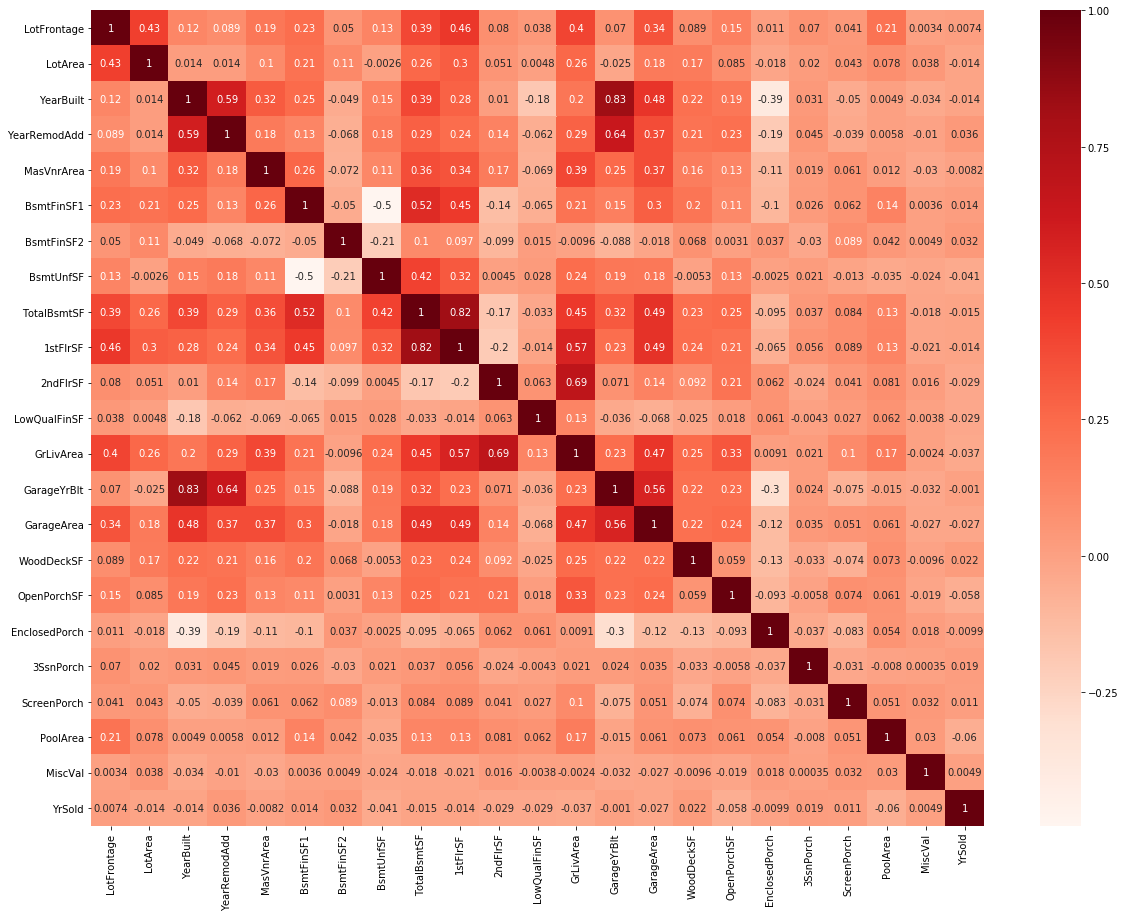

In [40]:
plt.figure(figsize=(20,15))
cor = x_train[continuous].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('corr_plot2.jpg')

## <font color='purple'>Inspecting the spread of each numeric Variable</font>

<p><a name="hist"></a></p>

#### Columns that need to be normalized and reglarized:
- BsmtFinSF1 -- skew right
- BsmtUnfSF  -- skew right -- mean of BsmtUnfSF: 567.24
- TotalBsmtSF -- normal -- mean of TotalBsmtSF: 1057.43
- LotArea -- mean of LotArea: 10516.83
- GrLivArea -- Slight skew right -- mean of GrLivArea: 1515.46
- TotRmsAbvGrd - Normal Dist
- GarageArea - Slight Right skew - mean of GarageArea: 472.98
- MoSold - Normal Dist around Summer Months


#### Columns to be thrown out
- LowQualFinSF - Practically all 0 values
- 2ndFlrSF - Practically all 0 values
- BsmtHalfBath - Most likely correlated with Bsmt Full Bath
- KitchenAbvGr - Practivally all the same value - Low variance
- WoodDeckSF - More than 1/2 0 values
- OpenPorchSF - More than 1/2 0 values
- EnclosedPorch - More than 1/2 0 values
- 3SsnPorch - Mostly 0 Values
- ScreenPorch - Mostly 0 Values
- PoolArea - Mostly 0 Values
- MiscVal - Mostly 0 Values


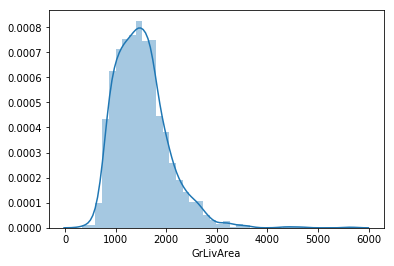

In [57]:
sns.distplot(x_train.GrLivArea, bins=40)

**************************************************
MSSubClass
mean of MSSubClass: 56.90
std of MSSubClass: 42.29
**************************************************


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


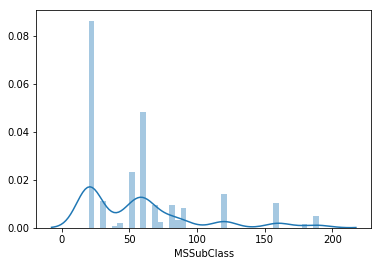

**************************************************
LotFrontage
mean of LotFrontage: 70.05
std of LotFrontage: 24.27
**************************************************


/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


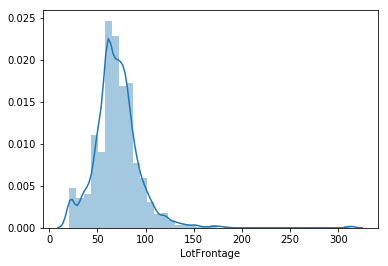

**************************************************
LotArea
mean of LotArea: 10516.83
std of LotArea: 9977.85
**************************************************


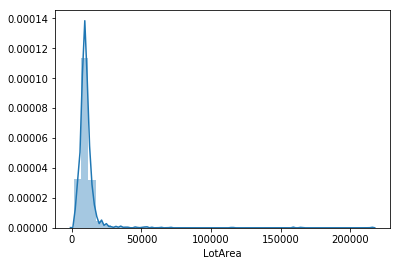

**************************************************
OverallQual
mean of OverallQual: 6.10
std of OverallQual: 1.38
**************************************************


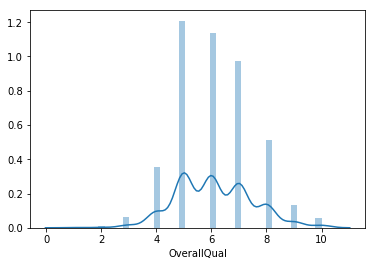

**************************************************
OverallCond
mean of OverallCond: 5.58
std of OverallCond: 1.11
**************************************************


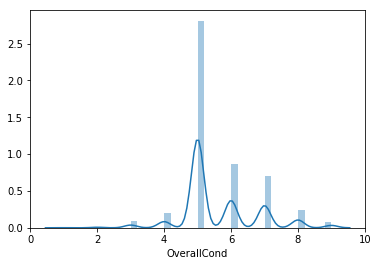

**************************************************
YearBuilt
mean of YearBuilt: 1971.27
std of YearBuilt: 30.19
**************************************************


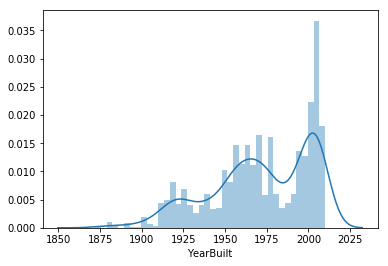

**************************************************
YearRemodAdd
mean of YearRemodAdd: 1984.87
std of YearRemodAdd: 20.64
**************************************************


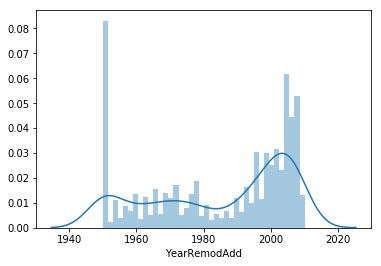

**************************************************
MasVnrArea
mean of MasVnrArea: 103.69
std of MasVnrArea: 181.00
**************************************************


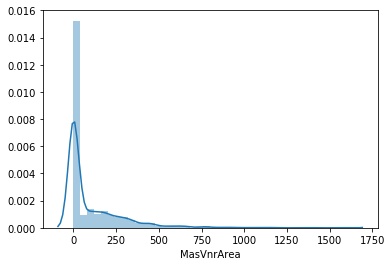

**************************************************
BsmtFinSF1
mean of BsmtFinSF1: 443.64
std of BsmtFinSF1: 455.94
**************************************************


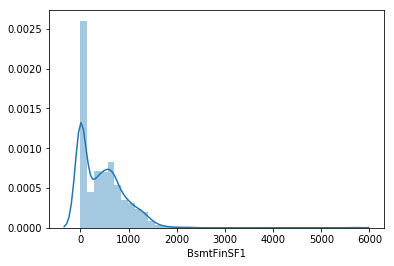

**************************************************
BsmtFinSF2
mean of BsmtFinSF2: 46.55
std of BsmtFinSF2: 161.26
**************************************************


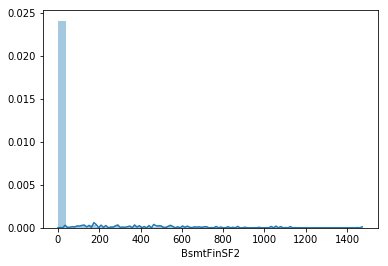

**************************************************
BsmtUnfSF
mean of BsmtUnfSF: 567.24
std of BsmtUnfSF: 441.72
**************************************************


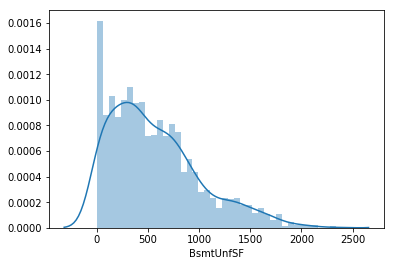

**************************************************
TotalBsmtSF
mean of TotalBsmtSF: 1057.43
std of TotalBsmtSF: 438.56
**************************************************


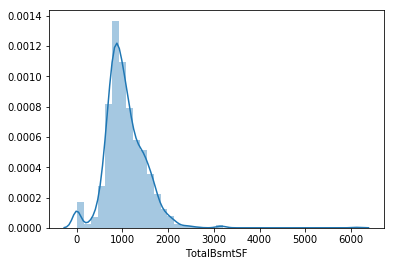

**************************************************
1stFlrSF
mean of 1stFlrSF: 1162.63
std of 1stFlrSF: 386.46
**************************************************


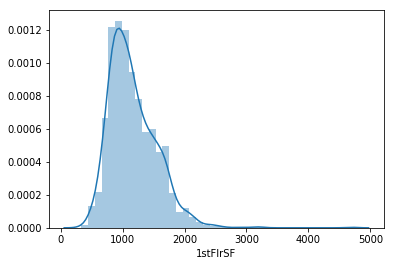

**************************************************
2ndFlrSF
mean of 2ndFlrSF: 346.99
std of 2ndFlrSF: 436.38
**************************************************


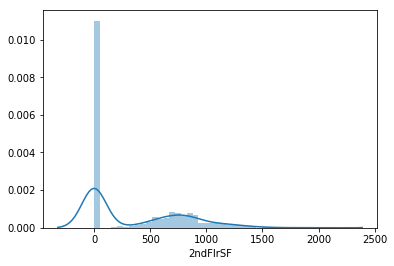

**************************************************
LowQualFinSF
mean of LowQualFinSF: 5.84
std of LowQualFinSF: 48.61
**************************************************


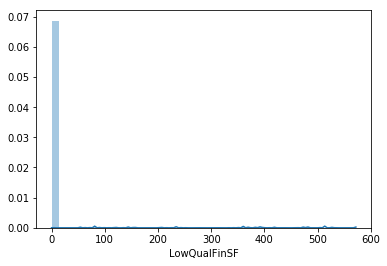

**************************************************
GrLivArea
mean of GrLivArea: 1515.46
std of GrLivArea: 525.30
**************************************************


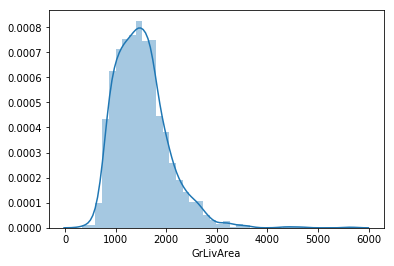

**************************************************
BsmtFullBath
mean of BsmtFullBath: 0.43
std of BsmtFullBath: 0.52
**************************************************


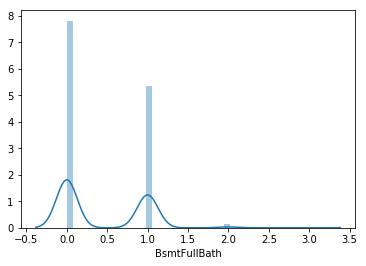

**************************************************
BsmtHalfBath
mean of BsmtHalfBath: 0.06
std of BsmtHalfBath: 0.24
**************************************************


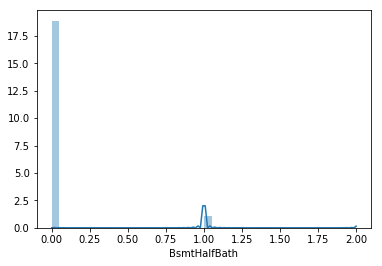

**************************************************
FullBath
mean of FullBath: 1.57
std of FullBath: 0.55
**************************************************


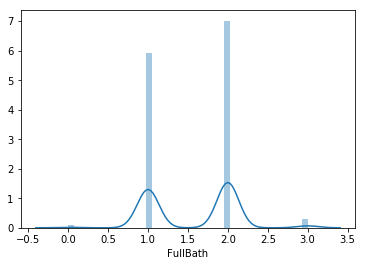

**************************************************
HalfBath
mean of HalfBath: 0.38
std of HalfBath: 0.50
**************************************************


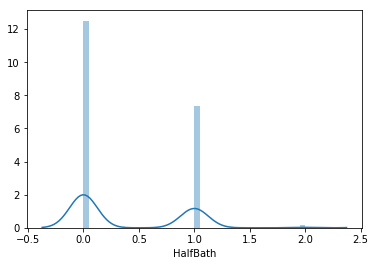

**************************************************
BedroomAbvGr
mean of BedroomAbvGr: 2.87
std of BedroomAbvGr: 0.82
**************************************************


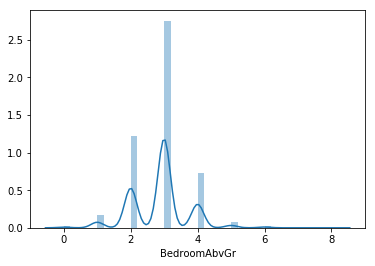

**************************************************
KitchenAbvGr
mean of KitchenAbvGr: 1.05
std of KitchenAbvGr: 0.22
**************************************************


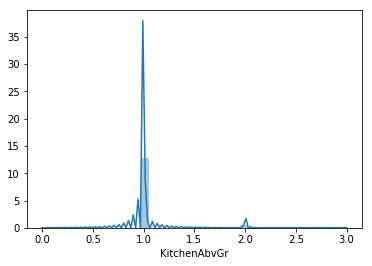

**************************************************
TotRmsAbvGrd
mean of TotRmsAbvGrd: 6.52
std of TotRmsAbvGrd: 1.62
**************************************************


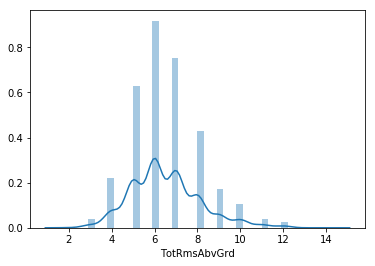

**************************************************
Fireplaces
mean of Fireplaces: 0.61
std of Fireplaces: 0.64
**************************************************


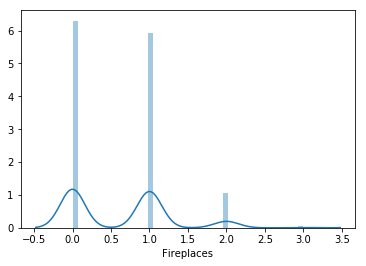

**************************************************
GarageYrBlt
mean of GarageYrBlt: 1978.51
std of GarageYrBlt: 24.68
**************************************************


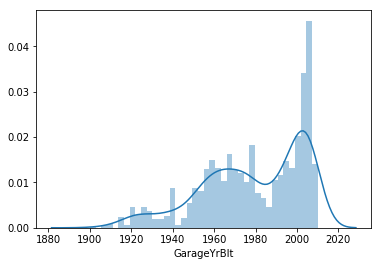

**************************************************
GarageCars
mean of GarageCars: 1.77
std of GarageCars: 0.75
**************************************************


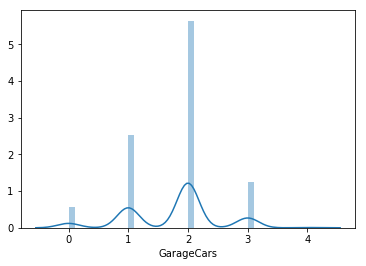

**************************************************
GarageArea
mean of GarageArea: 472.98
std of GarageArea: 213.73
**************************************************


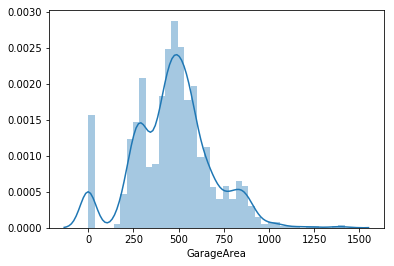

**************************************************
WoodDeckSF
mean of WoodDeckSF: 94.24
std of WoodDeckSF: 125.30
**************************************************


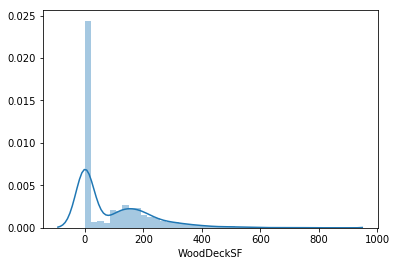

**************************************************
OpenPorchSF
mean of OpenPorchSF: 46.66
std of OpenPorchSF: 66.23
**************************************************


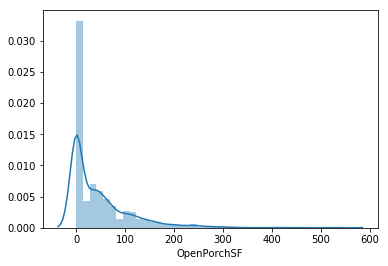

**************************************************
EnclosedPorch
mean of EnclosedPorch: 21.95
std of EnclosedPorch: 61.10
**************************************************


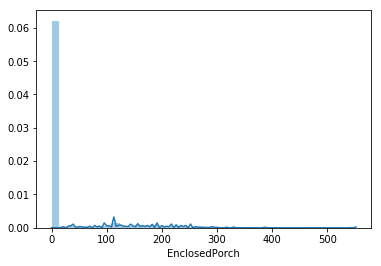

**************************************************
3SsnPorch
mean of 3SsnPorch: 3.41
std of 3SsnPorch: 29.31
**************************************************


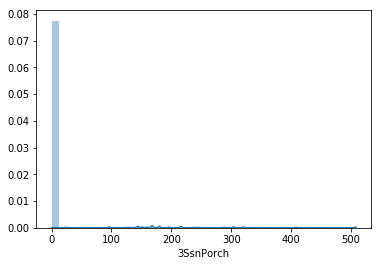

**************************************************
ScreenPorch
mean of ScreenPorch: 15.06
std of ScreenPorch: 55.74
**************************************************


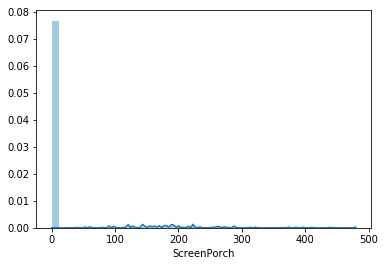

**************************************************
PoolArea
mean of PoolArea: 2.76
std of PoolArea: 40.16
**************************************************


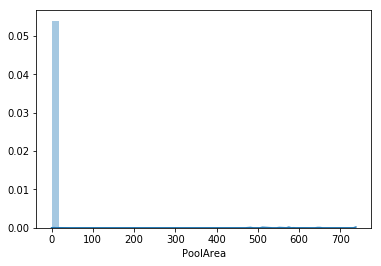

**************************************************
MiscVal
mean of MiscVal: 43.49
std of MiscVal: 495.95
**************************************************


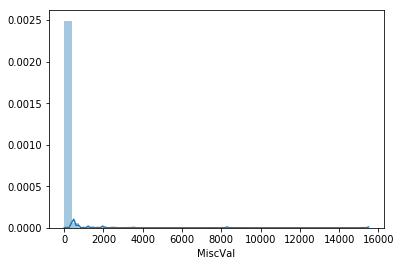

**************************************************
MoSold
mean of MoSold: 6.32
std of MoSold: 2.70
**************************************************


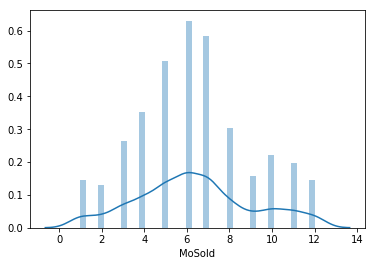

**************************************************
YrSold
mean of YrSold: 2007.82
std of YrSold: 1.33
**************************************************


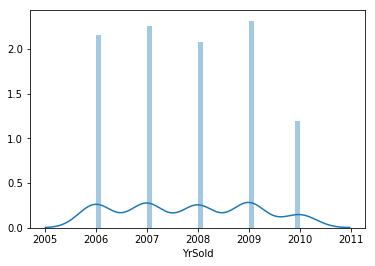

In [6]:
numbins = 40

for column in int_cols:
    print('*'*50)
    print(column)
    print('mean of {}: {:.2f}'.format(column, np.mean(x_train[column])))
    print('std of {}: {:.2f}'.format(column, np.std(x_train[column])))
    print('*'*50)
    sns.distplot( x_train[column], bins=40)
    plt.show()

## <font color='purple'>Inspecting categorical columns</font>

**************************************************
MSZoning
counts of MSZoning 

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
**************************************************


[Text(0, 0, 'RL'),
 Text(0, 0, 'RM'),
 Text(0, 0, 'FV'),
 Text(0, 0, 'RH'),
 Text(0, 0, 'C (all)')]

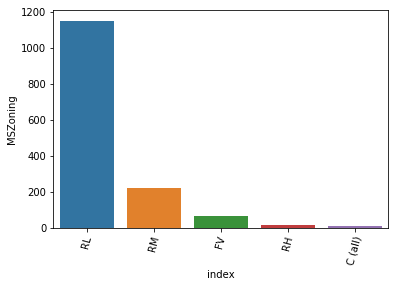

**************************************************
Street
counts of Street 

Pave    1454
Grvl       6
Name: Street, dtype: int64
**************************************************


[Text(0, 0, 'Pave'), Text(0, 0, 'Grvl')]

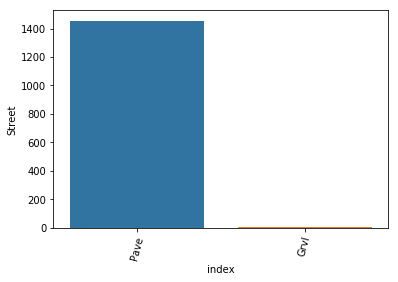

**************************************************
Alley
counts of Alley 

Grvl    50
Pave    41
Name: Alley, dtype: int64
**************************************************


[Text(0, 0, 'Grvl'), Text(0, 0, 'Pave')]

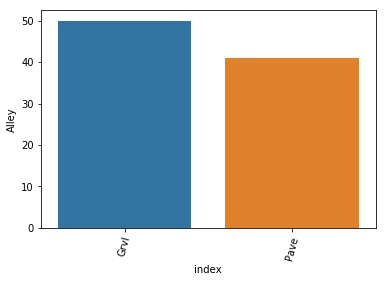

**************************************************
LotShape
counts of LotShape 

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
**************************************************


[Text(0, 0, 'Reg'), Text(0, 0, 'IR1'), Text(0, 0, 'IR2'), Text(0, 0, 'IR3')]

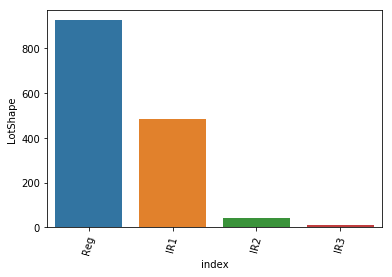

**************************************************
LandContour
counts of LandContour 

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
**************************************************


[Text(0, 0, 'Lvl'), Text(0, 0, 'Bnk'), Text(0, 0, 'HLS'), Text(0, 0, 'Low')]

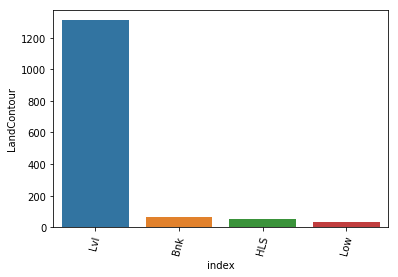

**************************************************
Utilities
counts of Utilities 

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
**************************************************


[Text(0, 0, 'AllPub'), Text(0, 0, 'NoSeWa')]

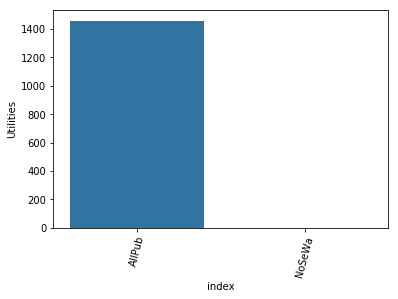

**************************************************
LotConfig
counts of LotConfig 

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
**************************************************


[Text(0, 0, 'Inside'),
 Text(0, 0, 'Corner'),
 Text(0, 0, 'CulDSac'),
 Text(0, 0, 'FR2'),
 Text(0, 0, 'FR3')]

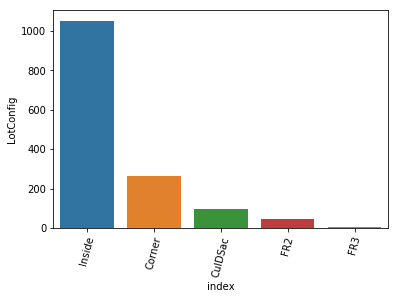

**************************************************
LandSlope
counts of LandSlope 

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
**************************************************


[Text(0, 0, 'Gtl'), Text(0, 0, 'Mod'), Text(0, 0, 'Sev')]

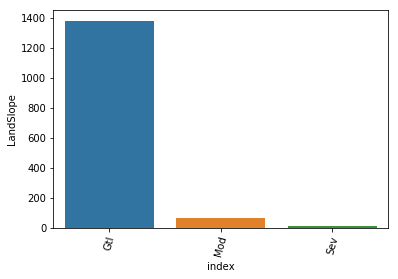

**************************************************
Neighborhood
counts of Neighborhood 

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
**************************************************


[Text(0, 0, 'NAmes'),
 Text(0, 0, 'CollgCr'),
 Text(0, 0, 'OldTown'),
 Text(0, 0, 'Edwards'),
 Text(0, 0, 'Somerst'),
 Text(0, 0, 'Gilbert'),
 Text(0, 0, 'NridgHt'),
 Text(0, 0, 'Sawyer'),
 Text(0, 0, 'NWAmes'),
 Text(0, 0, 'SawyerW'),
 Text(0, 0, 'BrkSide'),
 Text(0, 0, 'Crawfor'),
 Text(0, 0, 'Mitchel'),
 Text(0, 0, 'NoRidge'),
 Text(0, 0, 'Timber'),
 Text(0, 0, 'IDOTRR'),
 Text(0, 0, 'ClearCr'),
 Text(0, 0, 'StoneBr'),
 Text(0, 0, 'SWISU'),
 Text(0, 0, 'Blmngtn'),
 Text(0, 0, 'MeadowV'),
 Text(0, 0, 'BrDale'),
 Text(0, 0, 'Veenker'),
 Text(0, 0, 'NPkVill'),
 Text(0, 0, 'Blueste')]

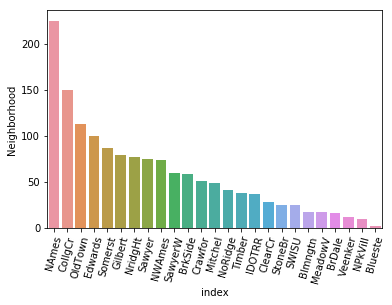

**************************************************
Condition1
counts of Condition1 

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
**************************************************


[Text(0, 0, 'Norm'),
 Text(0, 0, 'Feedr'),
 Text(0, 0, 'Artery'),
 Text(0, 0, 'RRAn'),
 Text(0, 0, 'PosN'),
 Text(0, 0, 'RRAe'),
 Text(0, 0, 'PosA'),
 Text(0, 0, 'RRNn'),
 Text(0, 0, 'RRNe')]

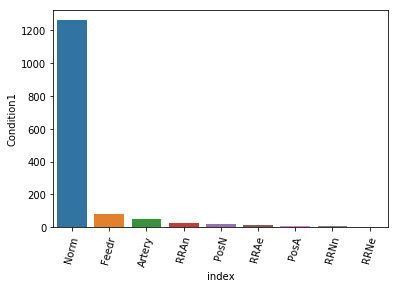

**************************************************
Condition2
counts of Condition2 

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64
**************************************************


[Text(0, 0, 'Norm'),
 Text(0, 0, 'Feedr'),
 Text(0, 0, 'PosN'),
 Text(0, 0, 'Artery'),
 Text(0, 0, 'RRNn'),
 Text(0, 0, 'RRAn'),
 Text(0, 0, 'PosA'),
 Text(0, 0, 'RRAe')]

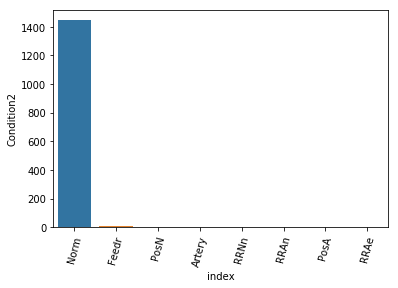

**************************************************
BldgType
counts of BldgType 

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
**************************************************


[Text(0, 0, '1Fam'),
 Text(0, 0, 'TwnhsE'),
 Text(0, 0, 'Duplex'),
 Text(0, 0, 'Twnhs'),
 Text(0, 0, '2fmCon')]

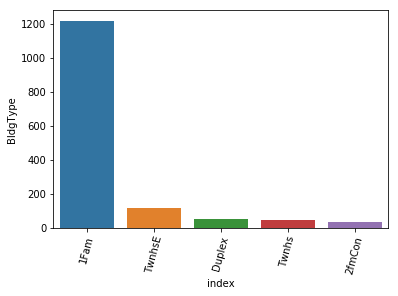

**************************************************
HouseStyle
counts of HouseStyle 

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
**************************************************


[Text(0, 0, '1Story'),
 Text(0, 0, '2Story'),
 Text(0, 0, '1.5Fin'),
 Text(0, 0, 'SLvl'),
 Text(0, 0, 'SFoyer'),
 Text(0, 0, '1.5Unf'),
 Text(0, 0, '2.5Unf'),
 Text(0, 0, '2.5Fin')]

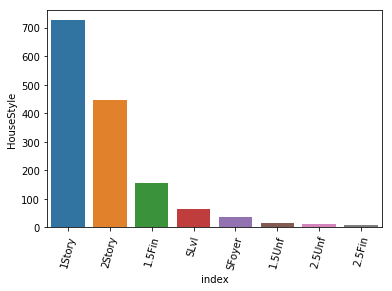

**************************************************
RoofStyle
counts of RoofStyle 

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
**************************************************


[Text(0, 0, 'Gable'),
 Text(0, 0, 'Hip'),
 Text(0, 0, 'Flat'),
 Text(0, 0, 'Gambrel'),
 Text(0, 0, 'Mansard'),
 Text(0, 0, 'Shed')]

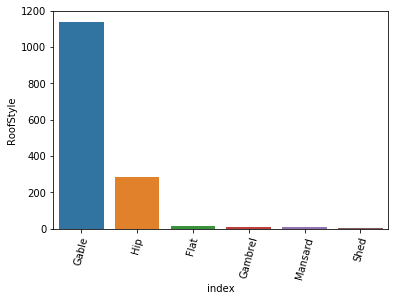

**************************************************
RoofMatl
counts of RoofMatl 

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64
**************************************************


[Text(0, 0, 'CompShg'),
 Text(0, 0, 'Tar&Grv'),
 Text(0, 0, 'WdShngl'),
 Text(0, 0, 'WdShake'),
 Text(0, 0, 'Membran'),
 Text(0, 0, 'Metal'),
 Text(0, 0, 'Roll'),
 Text(0, 0, 'ClyTile')]

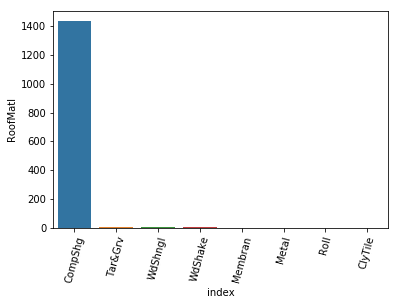

**************************************************
Exterior1st
counts of Exterior1st 

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
**************************************************


[Text(0, 0, 'VinylSd'),
 Text(0, 0, 'HdBoard'),
 Text(0, 0, 'MetalSd'),
 Text(0, 0, 'Wd Sdng'),
 Text(0, 0, 'Plywood'),
 Text(0, 0, 'CemntBd'),
 Text(0, 0, 'BrkFace'),
 Text(0, 0, 'WdShing'),
 Text(0, 0, 'Stucco'),
 Text(0, 0, 'AsbShng'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'BrkComm'),
 Text(0, 0, 'AsphShn'),
 Text(0, 0, 'ImStucc'),
 Text(0, 0, 'CBlock')]

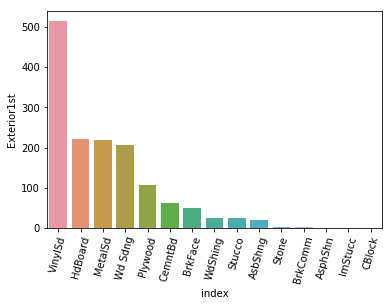

**************************************************
Exterior2nd
counts of Exterior2nd 

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
**************************************************


[Text(0, 0, 'VinylSd'),
 Text(0, 0, 'MetalSd'),
 Text(0, 0, 'HdBoard'),
 Text(0, 0, 'Wd Sdng'),
 Text(0, 0, 'Plywood'),
 Text(0, 0, 'CmentBd'),
 Text(0, 0, 'Wd Shng'),
 Text(0, 0, 'Stucco'),
 Text(0, 0, 'BrkFace'),
 Text(0, 0, 'AsbShng'),
 Text(0, 0, 'ImStucc'),
 Text(0, 0, 'Brk Cmn'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'AsphShn'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'CBlock')]

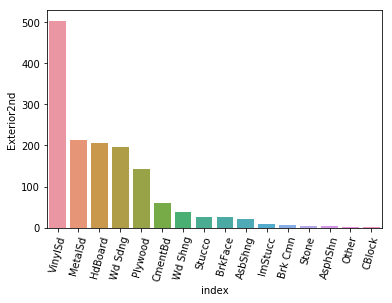

**************************************************
MasVnrType
counts of MasVnrType 

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
**************************************************


[Text(0, 0, 'None'),
 Text(0, 0, 'BrkFace'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'BrkCmn')]

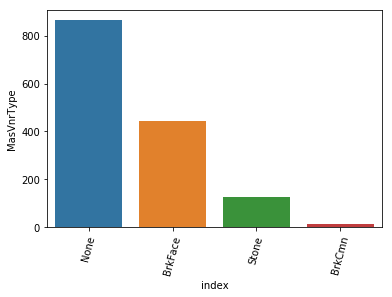

**************************************************
ExterQual
counts of ExterQual 

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
**************************************************


[Text(0, 0, 'TA'), Text(0, 0, 'Gd'), Text(0, 0, 'Ex'), Text(0, 0, 'Fa')]

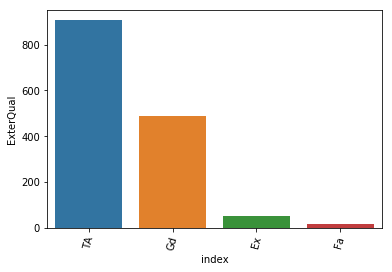

**************************************************
ExterCond
counts of ExterCond 

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
**************************************************


[Text(0, 0, 'TA'),
 Text(0, 0, 'Gd'),
 Text(0, 0, 'Fa'),
 Text(0, 0, 'Ex'),
 Text(0, 0, 'Po')]

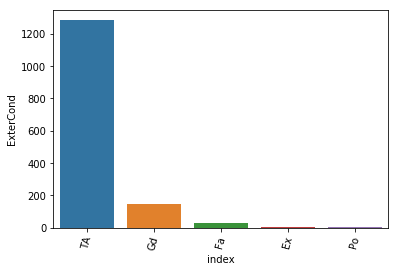

**************************************************
Foundation
counts of Foundation 

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
**************************************************


[Text(0, 0, 'PConc'),
 Text(0, 0, 'CBlock'),
 Text(0, 0, 'BrkTil'),
 Text(0, 0, 'Slab'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'Wood')]

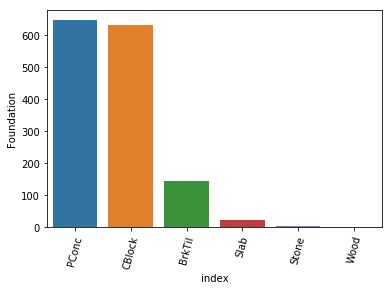

**************************************************
BsmtQual
counts of BsmtQual 

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
**************************************************


[Text(0, 0, 'TA'), Text(0, 0, 'Gd'), Text(0, 0, 'Ex'), Text(0, 0, 'Fa')]

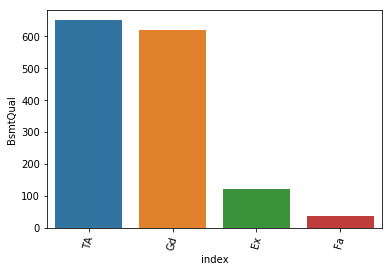

**************************************************
BsmtCond
counts of BsmtCond 

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
**************************************************


[Text(0, 0, 'TA'), Text(0, 0, 'Gd'), Text(0, 0, 'Fa'), Text(0, 0, 'Po')]

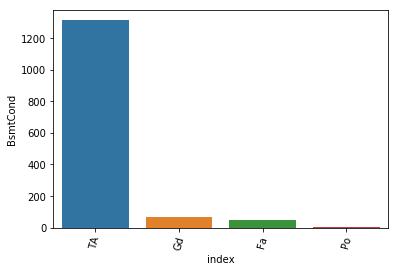

**************************************************
BsmtExposure
counts of BsmtExposure 

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
**************************************************


[Text(0, 0, 'No'), Text(0, 0, 'Av'), Text(0, 0, 'Gd'), Text(0, 0, 'Mn')]

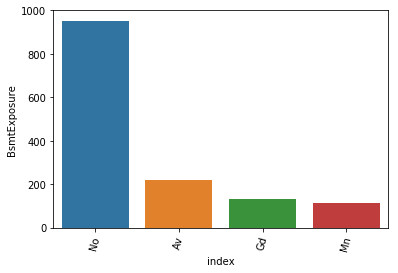

**************************************************
BsmtFinType1
counts of BsmtFinType1 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
**************************************************


[Text(0, 0, 'Unf'),
 Text(0, 0, 'GLQ'),
 Text(0, 0, 'ALQ'),
 Text(0, 0, 'BLQ'),
 Text(0, 0, 'Rec'),
 Text(0, 0, 'LwQ')]

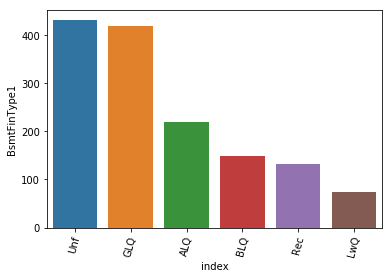

**************************************************
BsmtFinType2
counts of BsmtFinType2 

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
**************************************************


[Text(0, 0, 'Unf'),
 Text(0, 0, 'Rec'),
 Text(0, 0, 'LwQ'),
 Text(0, 0, 'BLQ'),
 Text(0, 0, 'ALQ'),
 Text(0, 0, 'GLQ')]

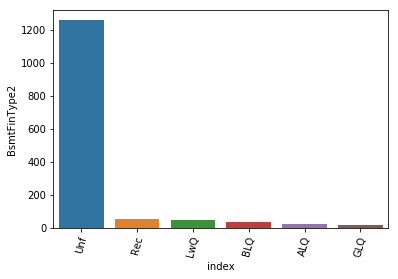

**************************************************
Heating
counts of Heating 

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
**************************************************


[Text(0, 0, 'GasA'),
 Text(0, 0, 'GasW'),
 Text(0, 0, 'Grav'),
 Text(0, 0, 'Wall'),
 Text(0, 0, 'OthW'),
 Text(0, 0, 'Floor')]

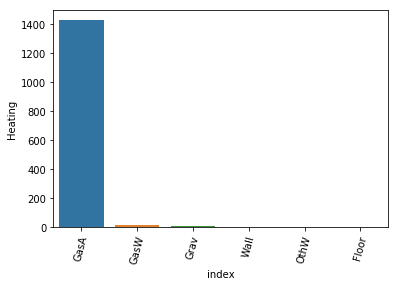

**************************************************
HeatingQC
counts of HeatingQC 

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
**************************************************


[Text(0, 0, 'Ex'),
 Text(0, 0, 'TA'),
 Text(0, 0, 'Gd'),
 Text(0, 0, 'Fa'),
 Text(0, 0, 'Po')]

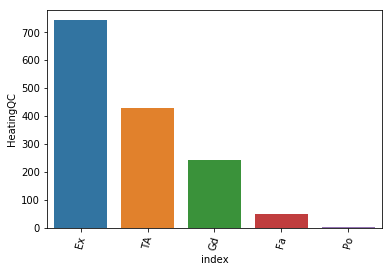

**************************************************
CentralAir
counts of CentralAir 

Y    1365
N      95
Name: CentralAir, dtype: int64
**************************************************


[Text(0, 0, 'Y'), Text(0, 0, 'N')]

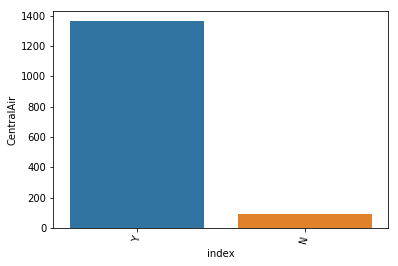

**************************************************
Electrical
counts of Electrical 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
**************************************************


[Text(0, 0, 'SBrkr'),
 Text(0, 0, 'FuseA'),
 Text(0, 0, 'FuseF'),
 Text(0, 0, 'FuseP'),
 Text(0, 0, 'Mix')]

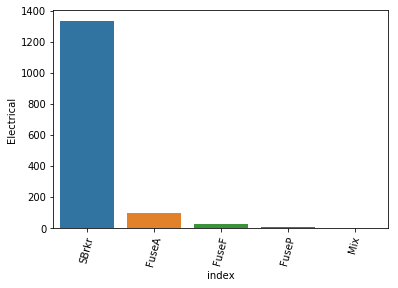

**************************************************
KitchenQual
counts of KitchenQual 

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
**************************************************


[Text(0, 0, 'TA'), Text(0, 0, 'Gd'), Text(0, 0, 'Ex'), Text(0, 0, 'Fa')]

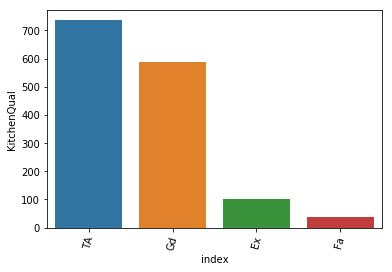

**************************************************
Functional
counts of Functional 

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
**************************************************


[Text(0, 0, 'Typ'),
 Text(0, 0, 'Min2'),
 Text(0, 0, 'Min1'),
 Text(0, 0, 'Mod'),
 Text(0, 0, 'Maj1'),
 Text(0, 0, 'Maj2'),
 Text(0, 0, 'Sev')]

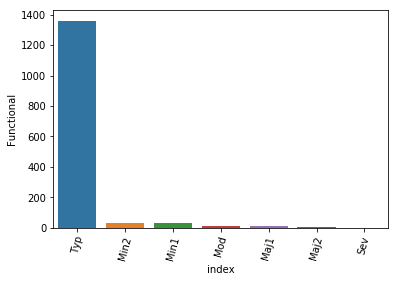

**************************************************
FireplaceQu
counts of FireplaceQu 

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
**************************************************


[Text(0, 0, 'Gd'),
 Text(0, 0, 'TA'),
 Text(0, 0, 'Fa'),
 Text(0, 0, 'Ex'),
 Text(0, 0, 'Po')]

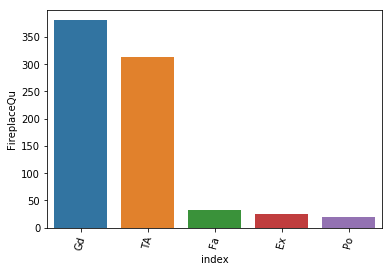

**************************************************
GarageType
counts of GarageType 

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
**************************************************


[Text(0, 0, 'Attchd'),
 Text(0, 0, 'Detchd'),
 Text(0, 0, 'BuiltIn'),
 Text(0, 0, 'Basment'),
 Text(0, 0, 'CarPort'),
 Text(0, 0, '2Types')]

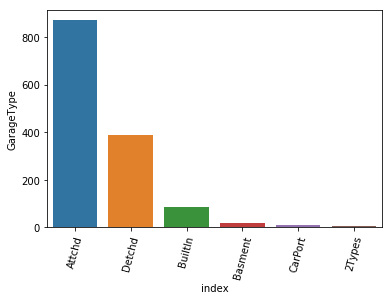

**************************************************
GarageFinish
counts of GarageFinish 

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
**************************************************


[Text(0, 0, 'Unf'), Text(0, 0, 'RFn'), Text(0, 0, 'Fin')]

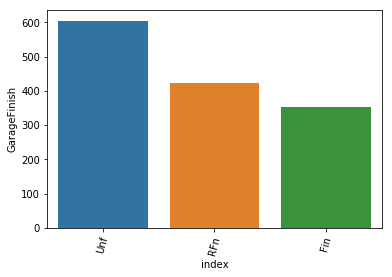

**************************************************
GarageQual
counts of GarageQual 

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
**************************************************


[Text(0, 0, 'TA'),
 Text(0, 0, 'Fa'),
 Text(0, 0, 'Gd'),
 Text(0, 0, 'Po'),
 Text(0, 0, 'Ex')]

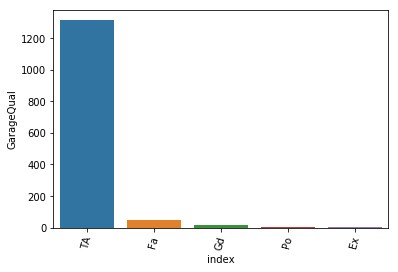

**************************************************
GarageCond
counts of GarageCond 

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
**************************************************


[Text(0, 0, 'TA'),
 Text(0, 0, 'Fa'),
 Text(0, 0, 'Gd'),
 Text(0, 0, 'Po'),
 Text(0, 0, 'Ex')]

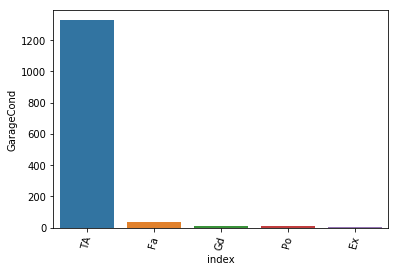

**************************************************
PavedDrive
counts of PavedDrive 

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
**************************************************


[Text(0, 0, 'Y'), Text(0, 0, 'N'), Text(0, 0, 'P')]

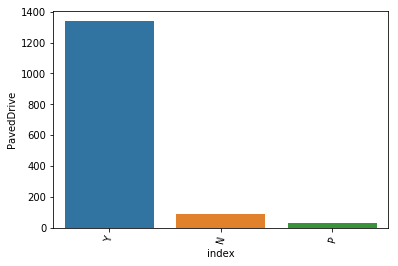

**************************************************
PoolQC
counts of PoolQC 

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64
**************************************************


[Text(0, 0, 'Gd'), Text(0, 0, 'Fa'), Text(0, 0, 'Ex')]

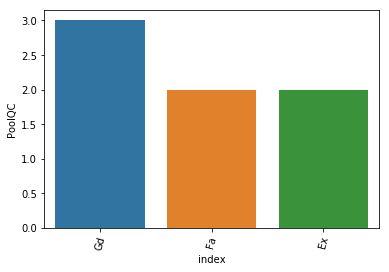

**************************************************
Fence
counts of Fence 

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
**************************************************


[Text(0, 0, 'MnPrv'),
 Text(0, 0, 'GdPrv'),
 Text(0, 0, 'GdWo'),
 Text(0, 0, 'MnWw')]

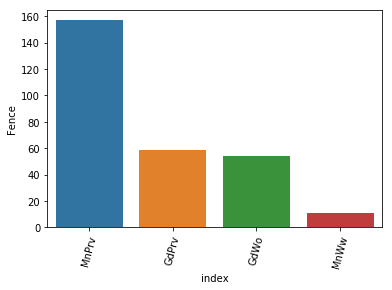

**************************************************
MiscFeature
counts of MiscFeature 

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64
**************************************************


[Text(0, 0, 'Shed'),
 Text(0, 0, 'Othr'),
 Text(0, 0, 'Gar2'),
 Text(0, 0, 'TenC')]

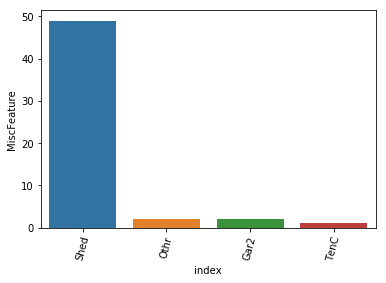

**************************************************
SaleType
counts of SaleType 

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
**************************************************


[Text(0, 0, 'WD'),
 Text(0, 0, 'New'),
 Text(0, 0, 'COD'),
 Text(0, 0, 'ConLD'),
 Text(0, 0, 'ConLI'),
 Text(0, 0, 'ConLw'),
 Text(0, 0, 'CWD'),
 Text(0, 0, 'Oth'),
 Text(0, 0, 'Con')]

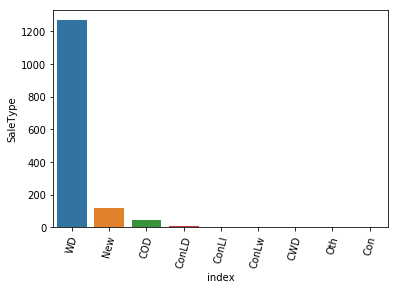

**************************************************
SaleCondition
counts of SaleCondition 

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
**************************************************


[Text(0, 0, 'Normal'),
 Text(0, 0, 'Partial'),
 Text(0, 0, 'Abnorml'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Alloca'),
 Text(0, 0, 'AdjLand')]

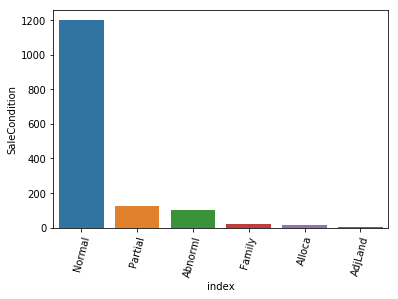

In [32]:


for column in cat_cols:
    x = x_train[column].value_counts().reset_index()['index']
    print('*'*50)
    print(column)
    print('counts of {} \n'.format(column))
    print(x_train[column].value_counts())
    print('*'*50)
    sns.barplot(x, x_train[column].value_counts().reset_index()[column]).set_xticklabels(labels=x, rotation=75)
    plt.show()

### Dropping numerical columns as a result of univariate analysis

<p><a name="dropunivariate"></a></p>

In [29]:
x_train.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [3]:
columns_to_drop_num = ['LowQualFinSF', '2ndFlrSF', 'BsmtHalfBath', 'KitchenAbvGr', \
                       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', \
                       'MasVnrArea', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF']

for column in columns_to_drop_num:
    x_train.drop(column, axis=1, inplace=True)
    test.drop(column, axis=1, inplace=True)
    

**************************************************
LotConfig vs. Sale Price 

**************************************************


Text(0.5, 0, 'LotConfig')

Text(0, 0.5, 'Sale Price')

Text(0.5, 1.0, 'Boxplot')

<Figure size 432x288 with 0 Axes>

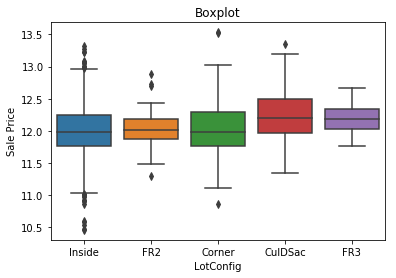

<Figure size 432x288 with 0 Axes>

**************************************************
Neighborhood vs. Sale Price 

**************************************************


Text(0.5, 0, 'Neighborhood')

Text(0, 0.5, 'Sale Price')

Text(0.5, 1.0, 'Boxplot')

<Figure size 432x288 with 0 Axes>

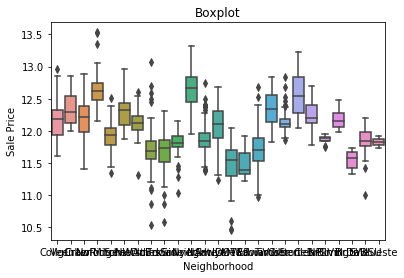

<Figure size 432x288 with 0 Axes>

**************************************************
BldgType vs. Sale Price 

**************************************************


Text(0.5, 0, 'BldgType')

Text(0, 0.5, 'Sale Price')

Text(0.5, 1.0, 'Boxplot')

<Figure size 432x288 with 0 Axes>

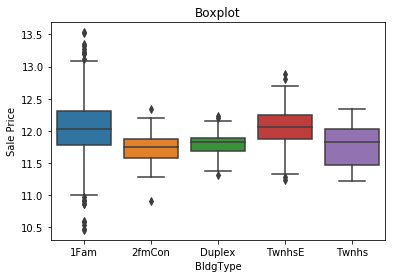

<Figure size 432x288 with 0 Axes>

**************************************************
HouseStyle vs. Sale Price 

**************************************************


Text(0.5, 0, 'HouseStyle')

Text(0, 0.5, 'Sale Price')

Text(0.5, 1.0, 'Boxplot')

<Figure size 432x288 with 0 Axes>

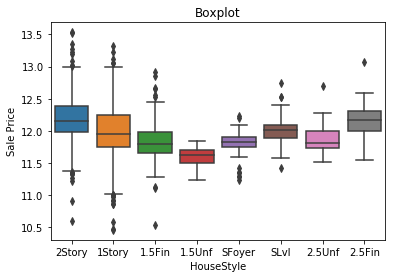

<Figure size 432x288 with 0 Axes>

**************************************************
Exterior1st vs. Sale Price 

**************************************************


Text(0.5, 0, 'Exterior1st')

Text(0, 0.5, 'Sale Price')

Text(0.5, 1.0, 'Boxplot')

<Figure size 432x288 with 0 Axes>

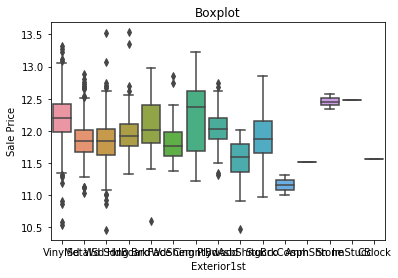

<Figure size 432x288 with 0 Axes>

**************************************************
ExterQual vs. Sale Price 

**************************************************


Text(0.5, 0, 'ExterQual')

Text(0, 0.5, 'Sale Price')

Text(0.5, 1.0, 'Boxplot')

<Figure size 432x288 with 0 Axes>

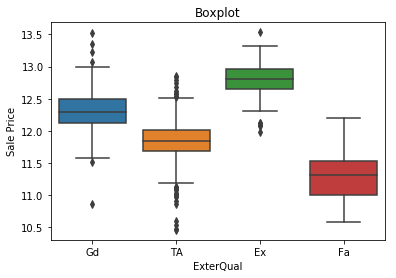

<Figure size 432x288 with 0 Axes>

**************************************************
BsmtFinType1 vs. Sale Price 

**************************************************


Text(0.5, 0, 'BsmtFinType1')

Text(0, 0.5, 'Sale Price')

Text(0.5, 1.0, 'Boxplot')

<Figure size 432x288 with 0 Axes>

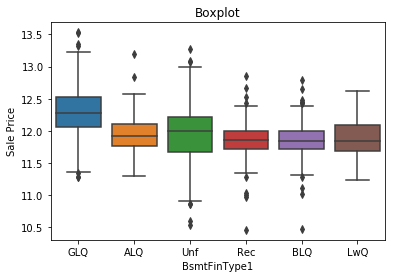

<Figure size 432x288 with 0 Axes>

**************************************************
KitchenQual vs. Sale Price 

**************************************************


Text(0.5, 0, 'KitchenQual')

Text(0, 0.5, 'Sale Price')

Text(0.5, 1.0, 'Boxplot')

<Figure size 432x288 with 0 Axes>

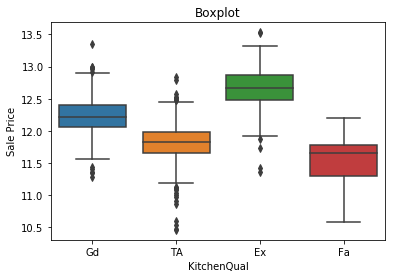

<Figure size 432x288 with 0 Axes>

**************************************************
GarageType vs. Sale Price 

**************************************************


Text(0.5, 0, 'GarageType')

Text(0, 0.5, 'Sale Price')

Text(0.5, 1.0, 'Boxplot')

<Figure size 432x288 with 0 Axes>

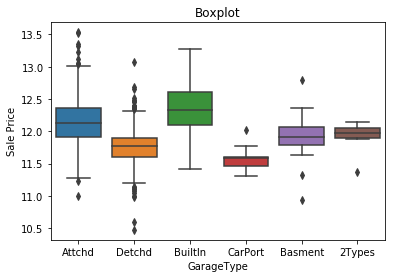

<Figure size 432x288 with 0 Axes>

**************************************************
SaleType vs. Sale Price 

**************************************************


Text(0.5, 0, 'SaleType')

Text(0, 0.5, 'Sale Price')

Text(0.5, 1.0, 'Boxplot')

<Figure size 432x288 with 0 Axes>

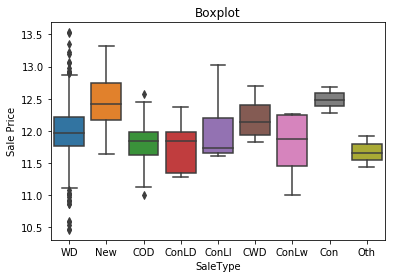

<Figure size 432x288 with 0 Axes>

In [13]:
y_train_df = pd.DataFrame(y_train)

cols_to_inspect = ['LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'Exterior1st', 'ExterQual', \
                   'BsmtFinType1', 'KitchenQual', 'GarageType', 'SaleType']

for column in cols_to_inspect:
    print('*'*50)
    print('{} vs. Sale Price \n'.format(column))
    print('*'*50)
    sns.boxplot(x_train[column], y_train_df.SalePrice)
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.title('Boxplot')
    plt.figure()
    plt.show()
    


### Dropping categorical columns as a result of univariate analysis

In [4]:
# First round to drop after variance inspection
columns_to_drop_cat = ['Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', \
                       'RoofStyle', 'RoofMatl', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtQual', \
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', \
                       'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleCondition', 'Exterior1st']

for column in columns_to_drop_cat:
    x_train.drop(column, axis=1, inplace=True)
    test.drop(column, axis=1, inplace=True)

# Second Round of columns to drop after inspection against Sale Price
columns_to_drop_cat2 = ['LotConfig', 'BldgType', 'HouseStyle', 'BsmtFinType1', 'GarageType', 'SaleType', 'GarageFinish']

for column in columns_to_drop_cat2:
    x_train.drop(column, axis=1, inplace=True)
    test.drop(column, axis=1, inplace=True)
    

## <font color='purple'>Inspecting Missingness</font>

<p><a name="missing"></a></p>

### Run this cell after dropping columns and inspecting again

In [7]:
# Finding all int type columns
int_cols = [column for column in x_train.columns if x_train[column].dtype == np.int64 or x_train[column].dtype == np.float64]

# Finding all String type categorical columns
cat_cols = [column for column in x_train.columns if x_train[column].dtype == object]

    

### Within the whole dataset

<p><a name="wholemissing"></a></p>

In [8]:
# These are columns have missingness within the whole train and test datasets
missing = pd.concat([x_train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train Dataset', 'Test Dataset']) 
print('Nan in the data sets')
print(missing[missing.sum(axis=1) > 0])

Nan in the data sets
              Train Dataset  Test Dataset
MSZoning                  0             4
LotFrontage             259           227
Alley                  1369          1352
Utilities                 0             2
Exterior1st               0             1
Exterior2nd               0             1
MasVnrType                8            16
MasVnrArea                8            15
BsmtQual                 37            44
BsmtCond                 37            45
BsmtExposure             38            44
BsmtFinType1             37            42
BsmtFinSF1                0             1
BsmtFinType2             38            42
BsmtFinSF2                0             1
BsmtUnfSF                 0             1
TotalBsmtSF               0             1
Electrical                1             0
BsmtFullBath              0             2
BsmtHalfBath              0             2
KitchenQual               0             1
Functional                0             2
FireplaceQu  

### Within the integer features

<p><a name="intmissing"></a></p>

In [13]:
# These are columns have missingness within just the integer datasets
missing_int = pd.concat([x_train[int_cols].isnull().sum(), test[int_cols].isnull().sum()], axis=1, keys=['Train Dataset Integer Cols', 'Test Dataset Integer Cols']) 
missing_int.reset_index(inplace=True)
missing_int.columns = ['columns', 'Train Dataset Integer Cols', 'Test Dataset Integer Cols']

print('Nan in the data sets')
print(missing_int[missing_int.sum(axis=1) > 0])

Nan in the data sets
Empty DataFrame
Columns: [columns, Train Dataset Integer Cols, Test Dataset Integer Cols]
Index: []


### Within the categorical features

<p><a name="catmissing"></a></p>

In [191]:
# These are columns have missingness within just the integer datasets
missing_cat = pd.concat([x_train[cat_cols].isnull().sum(), test[cat_cols].isnull().sum()], axis=1, keys=['Train Dataset Integer Cols', 'Test Dataset Integer Cols']) 
missing_cat.reset_index(inplace=True)
missing_cat.columns = ['columns', 'Train Dataset Integer Cols', 'Test Dataset Integer Cols']

print('Nan in the data sets')
print(missing_cat[missing_cat.sum(axis=1) > 0])

Nan in the data sets
       columns  Train Dataset Integer Cols  Test Dataset Integer Cols
0     MSZoning                           0                          4
3  KitchenQual                           0                          1


### Removing columns with more than 70% Missingness

- Alley
- PoolQC
- Fence
- MiscFeature

In [6]:
column_counts = x_train.count()

# Removing the columns with over 70% missing values
null_more_than_30 = [column for column in column_counts if column<.3*train.shape[0]]

# For loop to look through the count of missing rows and collect the names of the missing columns
removablecolumns = []
for value in null_more_than_30:
    removable = column_counts[column_counts == value].index[0]
    removablecolumns.append(removable)

# Remove the columns from bothe the train and test data sets
x_train.drop(removablecolumns, axis = 1, inplace = True)
test.drop(removablecolumns, axis = 1, inplace = True)

## <font color='purple'>Imputing Missing Values</font>

<p><a name="imputemissing"></a></p>

In [42]:
# Define an imputation function for imputing missing values with median
def feat_impute_median(column):
    x_train.loc[x_train[column].isnull(),column] = x_train[column].median()
    test.loc[test[column].isnull(),column] = test[column].median()

    
# # Define impute function for imputing custom value
# def feat_impute_cust(column, value):
#     x_train.loc[x_train[column].isnull(),column] = value
#     test.loc[test[column].isnull(),column] = value


# Define impute function for imputing mode of the column
def feat_impute_mode(column):
    x_train.loc[x_train[column].isnull(),column] = x_train[column].mode()[0]
    test.loc[test[column].isnull(),column] = test[column].mode()[0]
    

# Define impute function for imputing random values from feature
def feat_impute_rand(column):
    x_train.loc[x_train[column].isnull(), column] = random.choice(x_train.loc[x_train[column].notnull(), column])
    test.loc[test[column].isnull(), column] = random.choice(test.loc[test[column].notnull(), column])

In [45]:
# Impute missing values in the integer columns of test dataset
int_features_impute = [col for col in x_train.columns if x_train[col].dtype == np.int64]
for col in int_features_impute:
    feat_impute_median(col)

# Impute Float Value Features missing values
float_feats = [col for col in x_train.columns if x_train[col].dtype == np.float64]
for col in float_feats:
    feat_impute_rand(col)

# Categorical features imputed using mode
mode_features = ['KitchenQual', 'MSZoning']
for col in mode_features:
    feat_impute_mode(col)
    

## <font color='purple'>Fixing skew within the numeric features</font>

<p><a name="skew"></a></p>

### Distribution of the Prediction Variable
- Need to take a log transformation of the prediction variable for a normal distribution
- This is good for now but we will perform a box cox transformation later for a better transformation factor

In [10]:
integer_columns = ['MSSubClass', 'LotFrontage', 'LotArea',\
                   'TotalBsmtSF', '1stFlrSF', 'GrLivArea','GarageArea']

# Compute skew of each numeric column
skewness = x_train[integer_columns].apply(lambda x: skew(x))
skewed_feats = skewness[skewness>.75].index
x_train[skewed_feats] = np.log1p(x_train[skewed_feats])

## <font color='purple'>Dummifying Categorical Features</font>

<p><a name="dummy"></a></p>

- First change ordinal categorical features to ordered number

In [665]:
#Make a list of all the types of variables in the data set.   
continuous = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
              'GrLivArea', 'GarageYrBlt', 'GarageArea', 'YrSold']
nominal    = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 
              'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
              'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
              'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating',  'CentralAir', 'Electrical', 
              'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']
ordinal_num = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
               'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
               'GarageCars', 'MoSold']
ordinal_names = ['LandSlope', #Gtl Mod Sev
                 'GarageFinish', #Unf RFn Fin None
                 'BsmtExposure'] #No Av Gd Mn None
ordinal_qualcond = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                    'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 
                    'GarageCond'] #Ex Ta Gd Fa Po None



#Create dictionaries to replace string values with numerical values
LandSlope_ord_dic = {'Gtl':1, 'Mod':2, 'Sev':3}
GarageFinish_ord_dic = {'None':0, 'Unf':1, 'RFn':2, 'Fin':3}
BsmtExposure_ord_dic = {'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
qualcond_ord_dic = {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}


#Replace string values with numerical values
x_train.LandSlope.replace(LandSlope_ord_dic, inplace=True)
test.LandSlope.replace(LandSlope_ord_dic, inplace=True)

x_train.GarageFinish.replace(GarageFinish_ord_dic, inplace=True)
test.GarageFinish.replace(GarageFinish_ord_dic, inplace=True)

x_train.BsmtExposure.replace(BsmtExposure_ord_dic, inplace=True)
test.BsmtExposure.replace(BsmtExposure_ord_dic, inplace=True)

for feature in ordinal_qualcond:
    x_train[feature].replace(qualcond_ord_dic, inplace=True)
    test[feature].replace(qualcond_ord_dic, inplace=True)

### Dummify the Categoricals

In [14]:
# Finding all String type categorical columns
cat_cols = [column for column in x_train.columns if x_train[column].dtype == object]

    
#Dummify the Categorical Variables and adding them to the house_pca_data set
for variable in cat_cols:
    dummy = pd.get_dummies(x_train[variable], prefix=variable, prefix_sep='_')
    dummy_test = pd.get_dummies(test[variable], prefix=variable, prefix_sep='_')
    dummy.drop(list(dummy.columns)[0], axis=1, inplace=True) 
    dummy_test.drop(list(dummy_test.columns)[0], axis=1, inplace=True)                               #Drop 1st dummy is the dominant category                            
    house_pca_data = pd.concat([house_pca_data, dummy], axis=1)                            #concat train with dummy dataframes
    house_test_pca_data = pd.concat([house_test_pca_data, dummy_test], axis=1)
    
# for variable in ordinal:
#     dummy = pd.get_dummies(x_train[variable], prefix=variable, prefix_sep='_')
#     dummy.drop(list(dummy.columns)[0], axis=1, inplace=True)                 #Drop 1st dummy is the dominant category
#     x_train.drop(variable, axis=1, inplace=True)                             #Drop original categorical column
#     x_train = pd.concat([x_train, dummy], axis=1)                            #concat train with dummy dataframes
#     test.drop(variable, axis=1, inplace=True)
#     test = pd.concat([test, dummy], axis=1)

## <font color='purple'>PCA analysis on the continuous (non-date) integer features</font>

In [12]:
# Variables to run the pca on
pca_feats = ['OverallCond', 'OverallQual', 'LotArea', 'LotFrontage', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', \
             'GarageCars', 'GarageArea']

# First scaling the variables
x_train_scale = x_train[pca_feats].apply(lambda x: (x-np.mean(x))/np.std(x))
test_scale = test[pca_feats].apply(lambda x: (x-np.mean(x))/np.std(x))


In [13]:
from sklearn.decomposition import PCA

house_pca = PCA()
house_test_pca = PCA()

house_pca.set_params(n_components=5)
house_test_pca.set_params(n_components=5)

house_pca.fit(x_train_scale)
house_test_pca.fit(test_scale)


house_pca_data = pd.DataFrame(house_pca.transform(x_train_scale))
house_test_pca_data = pd.DataFrame(house_test_pca.transform(test_scale))



PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [254]:
house_pca.explained_variance_ratio_

array([0.42184175, 0.15018132, 0.11439727, 0.09487923, 0.07640264])

- The first 5 principal components acount for over 80% of the variation of the data

- We'll run a regression just using these 5 principal components

In [36]:
# Import the class you plan to use
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Instantiate Model
reg = LinearRegression()

# Split the data in to train and test
X_train, X_test, Y_train, Y_test = train_test_split(house_pca_data, y_train, test_size = 0.2, random_state = 4)

# Fit the model
reg.fit(X_train, Y_train)

#Predict
pred = reg.predict(X_test)

# MSE Mean Squared Error
MSE = np.mean((pred-Y_test)**2)

# R^2
R2 = reg.score(X_test, Y_test)

# intercept
intercept = reg.intercept_

# coefficients
coefs = reg.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [288]:
# test scores

pred_test = np.exp(reg.predict(house_test_pca_data))

d = {'Id':list(range(1461,len(pred_test)+1461)), 'SalePrice':pred_test}
third_submission = pd.DataFrame(data = d)

third_submission.to_csv(path_or_buf = 'third_submission.csv', index=False)

### Grid Search w/ Elastic Net and Random Forrest

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# This is one example with random forest - for other hyperparameters - lookup the base model function in sklearn and
# replace the values in grid_para

random_forest_model = RandomForestRegressor()

# GridSearchCV for random forest model
grid_para = [{                                                              # Creating the hyperparameter values to iterate through
    "criterion": ["mse", "mae"],
    "min_samples_leaf": range(2, 8, 10),
    "min_samples_split": np.linspace(start=4, stop=20, num=20, dtype=int),
    "n_estimators": [100]
}]
random_forest_model.set_params(random_state=108)                                     # Need to set random state so all iterations will not be random
grid_search_tree = GridSearchCV(random_forest_model, grid_para, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1) #Initialize the model
grid_search_tree.fit(house_pca_data, y_train)                                      



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=108, verbose=0, warm_start=False)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=108, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'criterion': ['mse', 'mae'], 'min_samples_leaf': range(2, 8, 10), 'min_samples_split': array([ 4,  4,  5,  6,  7,  8,  9,  9, 10, 11, 12, 13, 14, 14, 15, 16, 17,
       18, 19, 20]), 'n_estimators': [100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Initialize regression object - Process is the same for ridge and lasso

house_boost = GradientBoostingRegressor()

# GridSearchCV for random forest model
grid_para = [{                                                              # Creating the hyperparameter values to iterate through
    "loss": ['ls', 'lad', 'huber'],
    "subsample": np.arange(0.1,1, 10),
    'max_depth': range(3,10)
}]
house_boost.set_params(random_state=108)                                     # Need to set random state so all iterations will not be random
grid_search_boost = GridSearchCV(house_boost, grid_para, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1) #Initialize the model
grid_search_boost.fit(house_pca_data, y_train)                                      

best_estimator = grid_search_boost.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=108, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...e=108, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'loss': ['ls', 'lad', 'huber'], 'subsample': array([0.1]), 'max_depth': range(3, 10)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

#### Calculating the R^2 value with the best estimator

In [51]:
best_boost = grid_search_boost.best_estimator_

R2_train = best_boost.score(house_pca_data, y_train)
R2_test = best_boost.score(X_test, Y_test)

# Estimating with the best forest estimator
print('The train R2 value with the best Random Forest is {}'.format(R2_train))
print('The test R2 value with the best Random Forest is {}'.format(R2_test))

The train R2 value with the best Random Forest is 0.8998994120985798
The test R2 value with the best Random Forest is 0.9008388473128058


In [52]:
# test scores

pred_test = np.exp(best_boost.predict(house_test_pca_data))

# Make a dataframe for submission
d = {'Id':list(range(1461,len(pred_test)+1461)), 'SalePrice':pred_test}
fifth_submission = pd.DataFrame(data = d)

# Export dataframe to csv
fifth_submission.to_csv(path_or_buf = 'fifth_submission.csv', index=False)

## <font color='purple'>Calculating VIF for Numerical Features</font>

<p><a name="VIF"></a></p>



In [46]:
# Makes a copy of the original datframe and returns the copy with reduced number of features

columns_to_drop_VIF = []

def calculate_vif(df, thresh=5): 
    x_train_new = df.copy()
    
    dropped=True
    while dropped:
        dropped=False
        cols = x_train_new.columns
        variablesIdx = np.arange(x_train_new.shape[1])
        
        all_values = x_train_new[cols[variablesIdx]].values
        vif = [VIF(all_values, ix) for ix in np.arange(all_values.shape[1])]
        print(len(vif))
        
        max_loc = vif.index(max(vif))
        print('{}  VIF value: {:2f}'.format(x_train_new[cols[variablesIdx]].columns[max_loc], max(vif)))
        
        if max(vif) > thresh:
            print('Dropping {}  VIF value: {:2f} \n'.format(x_train_new[cols[variablesIdx]].columns[max_loc], max(vif)))
            
            columns_to_drop_VIF.append(x_train_new.columns.tolist()[max_loc])
            x_train_new.drop(x_train_new.columns.tolist()[max_loc], axis=1, inplace=True)
            
            dropped=True

    print('Remaining variables:')
    print(x_train_new.columns[variablesIdx])
    return x_train_new


# temp_df = calculate_vif(x_train[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', \
#                    'TotalBsmtSF', '1stFlrSF', 'GrLivArea','GarageArea']])

temp_df = calculate_vif(x_train[continuous])

/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


23
BsmtFinSF1  VIF value: inf
Dropping BsmtFinSF1  VIF value: inf 

22
1stFlrSF  VIF value: inf
Dropping 1stFlrSF  VIF value: inf 

21
GarageYrBlt  VIF value: 20579.548108
Dropping GarageYrBlt  VIF value: 20579.548108 

20
YearRemodAdd  VIF value: 15604.435169
Dropping YearRemodAdd  VIF value: 15604.435169 

19
YearBuilt  VIF value: 7476.248970
Dropping YearBuilt  VIF value: 7476.248970 

18
GrLivArea  VIF value: 60.515098
Dropping GrLivArea  VIF value: 60.515098 

17
TotalBsmtSF  VIF value: 15.650818
Dropping TotalBsmtSF  VIF value: 15.650818 

16
YrSold  VIF value: 13.784005
Dropping YrSold  VIF value: 13.784005 

15
LotFrontage  VIF value: 7.710806
Dropping LotFrontage  VIF value: 7.710806 

14
GarageArea  VIF value: 4.879738
Remaining variables:
Index(['LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF',
       'LowQualFinSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')
